In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import pickle

from helpers.training import *
from pathlib import Path
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
from joblib import load

In [53]:
source_path = Path('./data/model/01_clean_data.pkl')
source_data = load(source_path)

df = source_data['dataset']
df

,Living space,Plot area,price_cleaned,Floor,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,...,type_unified_penthouse,type_unified_rustico,type_unified_secondary-suite,type_unified_semi-detached-house,type_unified_single-room,type_unified_stepped-apartment,type_unified_stepped-house,type_unified_studio,type_unified_terrace-house,type_unified_villa
0,100.0,350.4,1150000.0,4.0,0.511176,0.286451,0.090908,47.415927,8.085840,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.0,222.0,1420000.0,2.4,0.511176,0.286451,0.090908,47.415927,8.085840,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,93.0,474.6,720000.0,2.0,0.163362,0.095877,0.001911,47.397416,8.043150,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,154.0,370.0,1430000.0,2.4,0.511176,0.286451,0.090908,47.415927,8.085840,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142.0,630.6,995000.0,0.0,0.333865,0.279276,0.145835,47.404870,8.052781,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21372,102.0,140.0,475000.0,1.4,0.495715,0.385885,0.097278,47.158311,9.468139,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21373,250.0,599.6,1490000.0,1.6,0.000000,0.000000,0.000000,47.467888,9.052650,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21374,240.0,455.0,1450000.0,1.6,0.000000,0.000000,0.000000,47.463605,9.038485,0.052609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21375,175.0,395.8,1290000.0,1.0,0.410843,0.151363,0.038351,47.526024,8.926627,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [54]:
y_kaggle = pd.read_csv('data/kaggle/03_prediction.csv')

source_path = Path('./data/kaggle/01_clean_data.pkl')
source_data = load(source_path)

X_kaggle = source_data['dataset']
X_kaggle['Id'] = X_kaggle.index

df_kaggle = X_kaggle.merge(y_kaggle, on='Id')
df_kaggle

,Living space,Plot area,Floor,ForestDensityL,ForestDensityM,ForestDensityS,Latitude,Longitude,NoisePollutionRailwayL,NoisePollutionRailwayM,...,type_unified_secondary-suite,type_unified_semi-detached-house,type_unified_single-room,type_unified_stepped-apartment,type_unified_stepped-house,type_unified_studio,type_unified_terrace-house,type_unified_villa,Id,Expected
0,220.0,733.0,3.2,0.164382,0.100030,0.063548,47.372110,8.075858,0.003811,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.685203e+06
1,230.0,702.0,3.2,0.260855,0.170434,0.083253,47.371558,8.073110,0.002623,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.501076e+06
2,131.0,350.4,2.6,0.434114,0.357984,0.125505,47.413754,8.082318,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,9.119998e+05
3,140.0,206.0,2.2,0.148190,0.076610,0.000000,47.373327,8.076892,0.005193,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,9.708343e+05
4,156.0,222.0,2.4,0.511176,0.286451,0.090908,47.415927,8.085840,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,1.202486e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24561,36.0,550.6,2.0,0.186881,0.018827,0.000000,47.204125,9.353275,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24561,3.809945e+05
24562,40.0,550.6,3.0,0.141426,0.003706,0.011718,47.203747,9.350731,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24562,3.236786e+05
24563,86.0,2803.0,0.8,0.141426,0.003706,0.011718,47.203747,9.350731,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24563,5.189485e+05
24564,127.0,550.6,2.0,0.141426,0.003706,0.011718,47.203747,9.350731,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24564,7.604331e+05


/var/folders/s5/5_td5ht10mg1fpxdl2s52d040000gn/T/ipykernel_3991/1769562417.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

/var/folders/s5/5_td5ht10mg1fpxdl2s52d040000gn/T/ipykernel_3991/1769562417.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



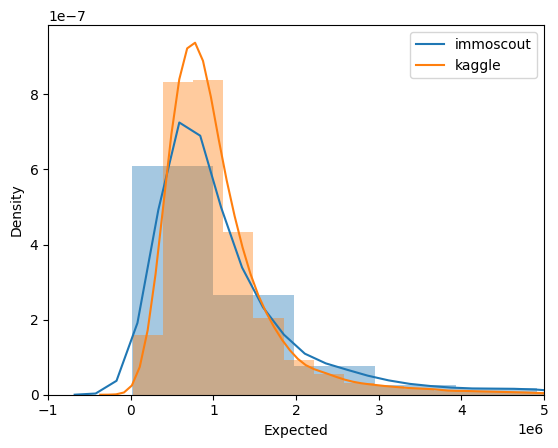

In [64]:
#distplot of price
sns.distplot(df['price_cleaned'])
sns.distplot(df_kaggle['Expected'])
#plot limit
plt.xlim(-1_000_000, 5_000_000)
#legend
plt.legend(['immoscout', 'kaggle'])

In [57]:
df["price_cleaned"].describe()

count    2.137700e+04
mean     1.302811e+06
std      1.704761e+06
min      1.700000e+04
25%      5.750000e+05
50%      8.610000e+05
75%      1.419000e+06
max      4.900000e+07
Name: price_cleaned, dtype: float64

<AxesSubplot: >

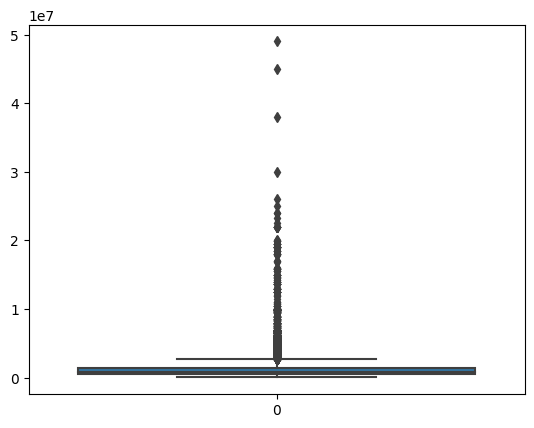

In [61]:
#boxplot of price_cleaned
sns.boxplot(df['price_cleaned'])

<AxesSubplot: >

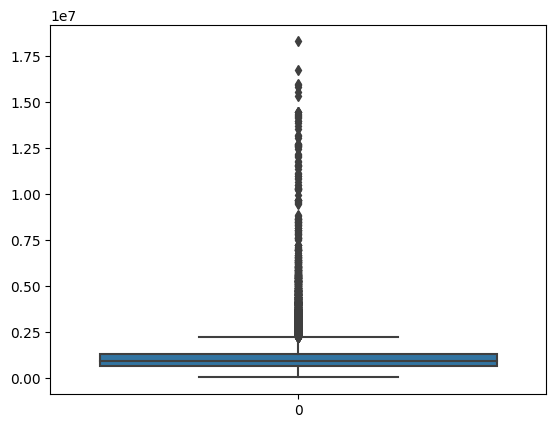

In [62]:
sns.boxplot(df_kaggle['Expected'])

In [68]:
#id 13936 row
z = df_kaggle.loc[4634]